In [2]:
import os
from get_price import get_price
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sendTelegramMsg import send_telegram_image,send_telegram_message
from dotenv import load_dotenv
# load_dotenv()


True

In [3]:
df=pd.read_csv(os.environ.get("SECRET_SHEET"))
df
# df1=pd.read_csv(os.environ.get("SHEET"))

# #df1 update keys to lower case
# df.columns = df.columns.str.upper()

# #in df add df1
# df=pd.concat([df, df1], ignore_index=True)
# df

,EXCHANGE,TRADINGSYMBOL,SECURITYID,ISIN,TOTALQTY,DPQTY,T1QTY,AVAILABLEQTY,COLLATERALQTY,AVGCOSTPRICE,Live
0,ALL,EQUITASBNK,913,INE063P01018,42,42,0,42,0,92.65238,112.05
1,ALL,GATEWAY,8510,INE079J01017,41,41,0,41,0,92.63659,110.00
2,ALL,RBZJEWEL,20874,INE0PEQ01016,26,26,0,26,0,100.00000,215.00
3,ALL,AAVAS,5385,INE216P01012,4,4,0,4,0,1542.85000,1498.40
4,ALL,MSTCLTD,9356,INE255X01014,13,8,5,13,0,736.99230,990.00
5,BSE,NITTAGELA,506532,INE265B01019,8,8,0,8,0,920.63120,1035.75
6,ALL,SHANKARA,20321,INE274V01019,8,8,0,8,0,723.42500,712.00
7,ALL,HOMEFIRST,2056,INE481N01025,4,4,0,4,0,888.56250,990.00
8,ALL,PRICOLLTD,19631,INE726V01018,19,19,0,19,0,337.71317,378.00
9,ALL,MCDOWELL-N,10447,INE854D01024,7,7,0,7,0,1048.64280,1071.00


In [4]:
unwanted_columns = ['EXCHANGE', 'ISIN', 'T1QTY', 'TOTALQTY', 'DPQTY', 'T1QTY', 'COLLATERALQTY',"Live"]

# Remove unwanted columns
df = df.drop(columns=unwanted_columns)
df

,TRADINGSYMBOL,SECURITYID,AVAILABLEQTY,AVGCOSTPRICE
0,EQUITASBNK,913,42,92.65238
1,GATEWAY,8510,41,92.63659
2,RBZJEWEL,20874,26,100.00000
3,AAVAS,5385,4,1542.85000
4,MSTCLTD,9356,13,736.99230
5,NITTAGELA,506532,8,920.63120
6,SHANKARA,20321,8,723.42500
7,HOMEFIRST,2056,4,888.56250
8,PRICOLLTD,19631,19,337.71317
9,MCDOWELL-N,10447,7,1048.64280


In [5]:
#loop through the dataframe and get the price of each TickerSymbol in the dataframe and add it to the dataframe


for index, row in df.iterrows():
    df.at[index, 'LIVEPRICE'] = get_price(row['TRADINGSYMBOL'])
df

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NITTAGELA.NS?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NITTAGELA.NS&crumb=6zcHUK3we0e


,TRADINGSYMBOL,SECURITYID,AVAILABLEQTY,AVGCOSTPRICE,LIVEPRICE
0,EQUITASBNK,913,42,92.65238,111.75
1,GATEWAY,8510,41,92.63659,110.00
2,RBZJEWEL,20874,26,100.00000,215.40
3,AAVAS,5385,4,1542.85000,1501.15
4,MSTCLTD,9356,13,736.99230,989.15
5,NITTAGELA,506532,8,920.63120,1035.75
6,SHANKARA,20321,8,723.42500,711.50
7,HOMEFIRST,2056,4,888.56250,983.95
8,PRICOLLTD,19631,19,337.71317,378.40
9,MCDOWELL-N,10447,7,1048.64280,1095.45


In [6]:
#Calculate Profit using availableQty, avgCostPrice, LivePrice

for index, row in df.iterrows():
    df.at[index, 'PROFIT'] = row['AVAILABLEQTY']*(row['LIVEPRICE']-row['AVGCOSTPRICE'])
df

,TRADINGSYMBOL,SECURITYID,AVAILABLEQTY,AVGCOSTPRICE,LIVEPRICE,PROFIT
0,EQUITASBNK,913,42,92.65238,111.75,802.10004
1,GATEWAY,8510,41,92.63659,110.00,711.89981
2,RBZJEWEL,20874,26,100.00000,215.40,3000.40000
3,AAVAS,5385,4,1542.85000,1501.15,-166.80000
4,MSTCLTD,9356,13,736.99230,989.15,3278.05010
5,NITTAGELA,506532,8,920.63120,1035.75,920.95040
6,SHANKARA,20321,8,723.42500,711.50,-95.40000
7,HOMEFIRST,2056,4,888.56250,983.95,381.55000
8,PRICOLLTD,19631,19,337.71317,378.40,773.04977
9,MCDOWELL-N,10447,7,1048.64280,1095.45,327.65040


In [7]:
# Calculate invested amount and Profit

InvestedAmount = 0
Profit=0

for index, row in df.iterrows():
    InvestedAmount = InvestedAmount + row['AVGCOSTPRICE']*row['AVAILABLEQTY']
    Profit = Profit + row['PROFIT']


print("Invested Amount = ",InvestedAmount)
print("Profit = ",Profit)

#Calculate ROI
ROI = (Profit/InvestedAmount)*100
print("ROI = ",round(ROI,2),end="%")

#Calculate Profit Margin
ProfitMargin = (Profit/InvestedAmount)*100
print("Profit Margin = ",round(ProfitMargin,2),end="%")

Invested Amount =  103283.26998000001
Profit =  15720.130020000006
ROI =  15.22%Profit Margin =  15.22%

In [8]:

result=f"""
Invested Amount = {round(InvestedAmount,2)}
Profit = {round(Profit,2)}
Profit Margin = {round(ProfitMargin,2)}
ROI = {round(ROI,2)}
"""

send_telegram_message(result)

In [9]:
#from df get best performing stocks

stock=df[df['PROFIT']==df['PROFIT'].max()]
send_telegram_message(stock.to_markdown)

send_telegram_message(df.to_markdown)

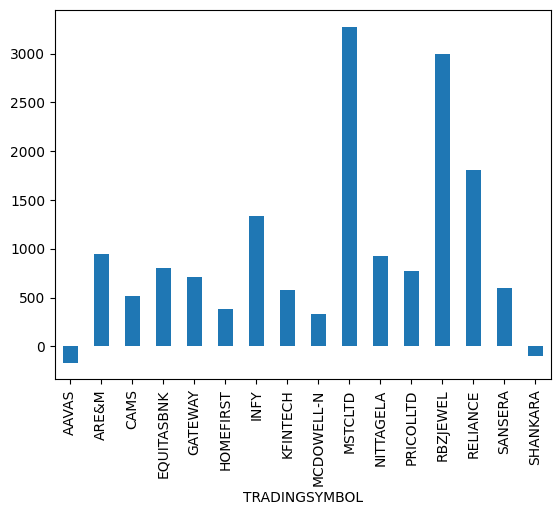

In [10]:
# df group by TRADINGSYMBOL and sum the PROFIT column

df.groupby('TRADINGSYMBOL')['PROFIT'].sum().plot(kind='bar').get_figure().savefig('bestPerformingStocks.png')


In [12]:
send_telegram_image('bestPerformingStocks.png')